<a href="https://colab.research.google.com/github/DinurakshanRavichandran/Visio-Glance/blob/XAI/Sakuna_Eye_Disease_Detection_Model_h5(LIME_%26_Grad_Cam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
from google.colab import drive
drive.mount('/content/drive')
import joblib

# Define the path where the model is saved
model_save_path = '/content/drive/MyDrive/Sakuna_Eye_Disease_Detection_Model.h5'

# Load the model using joblib
try:
    loaded_model = joblib.load(model_save_path)
    print("Model imported successfully!")  # Print message if successful
except Exception as e:
    print(f"Error importing the model: {e}")  # Print error message if it fails

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model imported successfully!


In [102]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model
model = ResNet50(weights='imagenet', include_top=False)

# Print the model summary
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_77            │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer_77[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [103]:
import joblib
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np

# Define model path
model_path = '/content/drive/MyDrive/Sakuna_Eye_Disease_Detection_Model.h5'

# Try loading with joblib (used for scikit-learn models)
try:
    model = joblib.load(model_path)
    print("✅ Model loaded using joblib (likely scikit-learn).")

    # Check if it's a classifier or regressor
    if hasattr(model, "predict"):
        print("✔ This model supports predictions.")
        test_input = np.random.rand(1, model.n_features_in_)  # Generate dummy input
        try:
            test_output = model.predict(test_input)
            print(f"Prediction shape: {test_output.shape}")
        except Exception as e:
            print(f"Prediction failed: {e}")
    else:
        print(" Model does not support predictions.")

except Exception as e:
    print(f"Joblib load failed: {e}. Trying TensorFlow/Keras...")

    # Try loading with TensorFlow
    try:
        model = load_model(model_path)
        print(" Model loaded using TensorFlow/Keras (likely a deep learning model).")

        # Print model summary
        model.summary()

        # Check input shape
        input_shape = model.input_shape
        print(f" Expected input shape: {input_shape}")

    except Exception as e:
        print(f" TensorFlow model load failed: {e}")


✅ Model loaded using joblib (likely scikit-learn).
✔ This model supports predictions.
Prediction shape: (1,)


In [104]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
import joblib
from lime import lime_image
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load your trained model using joblib
model_path = '/content/drive/MyDrive/Sakuna_Eye_Disease_Detection_Model.h5'
model = joblib.load(model_path)

# Define the prediction function for LIME
def predict_fn(images):
    # Preprocess the input image
    preprocessed_images = preprocess_input(images.astype('float32'))  # Ensure float32 format

    # Extract features using ResNet50
    resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    features = resnet_model.predict(preprocessed_images, verbose=0)
    features = features.reshape(features.shape[0], -1)  # Flatten feature maps

    # Make predictions using your trained model
    predictions = model.predict(features)

    # Print the shape of predictions for debugging
    print("Raw Predictions Shape:", predictions.shape)

    # If predictions is 1D, return it directly
    if predictions.ndim == 1:
        return np.array([np.argmax(predictions)])  # Convert scalar to array

    # Otherwise, apply argmax across the correct axis
    return predictions.argmax(axis=1)  # Return the index of the predicted class

# ✅ Now `predict_fn()` is defined before being called

# Simulated test image
test_img = np.random.rand(1, 224, 224, 3) * 255
test_prediction = predict_fn(test_img)
print("Fixed Prediction Shape:", test_prediction.shape)  # Should print (1,)


Raw Predictions Shape: (1,)
Fixed Prediction Shape: (1,)


In [105]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import joblib
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50

# Load the trained model
model_path = '/content/drive/MyDrive/Sakuna_Eye_Disease_Detection_Model.h5'
model = joblib.load(model_path)

# Load and preprocess the fundus image
image_path = '/content/drive/MyDrive/DSGP/dataset/cataract/cataract_097.png'
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Extract features using ResNet50
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
features = resnet_model.predict(img_array, verbose=0)
features = features.flatten()

# Make prediction
prediction = model.predict(features.reshape(1, -1))
predicted_class_index = prediction[0]

# Get the predicted class name
class_names = ['DR', 'N', 'G', 'C']
predicted_class_name = class_names[predicted_class_index]
print(f"Predicted Eye Disease: {predicted_class_name}")

Mounted at /content/drive
Predicted Eye Disease: C


In [106]:
import tensorflow as tf
print(tf.__version__)


2.18.0


Mounted at /content/drive
Predicted Eye Disease: C


  0%|          | 0/1000 [00:00<?, ?it/s]

Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: (10, 1)
Processed 10 samples. Prediction shape: 

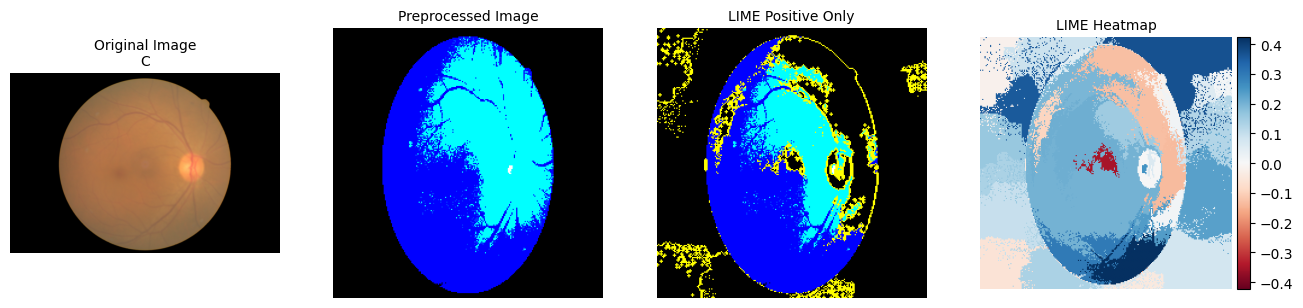

In [107]:
from google.colab import drive
import joblib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load trained model
model_path = '/content/drive/MyDrive/Sakuna_Eye_Disease_Detection_Model.h5'
model = joblib.load(model_path)

# Load ResNet50 for feature extraction
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Load and preprocess image
image_path = '/content/drive/MyDrive/DSGP/dataset/cataract/cataract_096.png'
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Extract features using ResNet50
features = resnet_model.predict(img_array, verbose=0)
features = features.flatten()

# Make prediction (Correct method)
prediction = model.predict(features.reshape(1, -1))
predicted_class_index = int(prediction[0])

# Get class name
class_names = ['DR', 'N', 'G', 'C']
predicted_class_name = class_names[predicted_class_index]
print(f"Predicted Eye Disease: {predicted_class_name}")

# Define function for LIME (Fixing the shape of the output)

def predict_fn(images):
    """Takes a batch of images and returns a batch of class probabilities."""
    preprocessed_images = preprocess_input(images.astype("float32"))  # Convert to float32
    features = resnet_model.predict(preprocessed_images, verbose=0)
    features = features.reshape(features.shape[0], -1)  # Flatten feature maps

    predictions = model.predict(features)  # Get raw model outputs

    # Ensure predictions are 2D (batch_size, num_classes)
    if len(predictions.shape) == 1:  # If output is (batch_size,), reshape to (batch_size, 1)
        predictions = np.expand_dims(predictions, axis=-1)

    # Convert predictions to float32 to prevent TensorFlow dtype errors
    predictions = predictions.astype(np.float32)

    # Convert to probabilities if multi-class
    if predictions.shape[-1] > 1:
        predictions = tf.nn.softmax(predictions).numpy()

    print(f"Processed {images.shape[0]} samples. Prediction shape: {predictions.shape}")
    return predictions  # Shape: (batch_size, num_classes)


# Apply LIME
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    img_array[0].astype("double"), predict_fn, top_labels=1, hide_color=0, num_samples=1000
)

# Get LIME mask
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0], positive_only=True, num_features=50, hide_rest=True
)

# Plot results
fig, axs = plt.subplots(1, 4, figsize=(16, 8))

# Original Image
axs[0].imshow(mpimg.imread(image_path))
axs[0].axis("off")
axs[0].set_title(f"Original Image\n{predicted_class_name}", fontsize=10)

# Preprocessed Image
axs[1].imshow(np.vstack(img_array))
axs[1].axis("off")
axs[1].set_title("Preprocessed Image", fontsize=10)

# LIME Explanation
axs[2].imshow(mark_boundaries(temp, mask))
axs[2].axis("off")
axs[2].set_title("LIME Positive Only", fontsize=10)

# LIME Heatmap
ind = explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
im = axs[3].imshow(heatmap, cmap="RdBu", vmin=-heatmap.max(), vmax=heatmap.max())
axs[3].axis("off")
axs[3].set_title("LIME Heatmap", fontsize=10)

# Add colorbar
divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax)

plt.show()


Mounted at /content/drive
Predicted Eye Disease: C


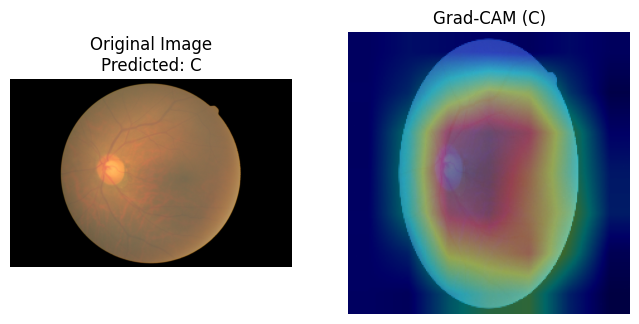

In [108]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
import matplotlib.pyplot as plt
import cv2  # For image processing
import joblib  # For loading the custom model
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load the trained model
model_path = '/content/drive/MyDrive/Sakuna_Eye_Disease_Detection_Model.h5'
model = joblib.load(model_path)

# Load and preprocess the fundus image
image_path = '/content/drive/MyDrive/DSGP/dataset/cataract/cataract_096.png'
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Extract features using ResNet50
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
features = resnet_model.predict(img_array, verbose=0)
features = features.flatten()

# Make prediction
prediction = model.predict(features.reshape(1, -1))
predicted_class_index = prediction[0]

# Get the predicted class name
class_names = ['DR', 'N', 'G', 'C']
predicted_class_name = class_names[predicted_class_index]
print(f"Predicted Eye Disease: {predicted_class_name}")

# Define Grad-CAM function
def grad_cam(img_path, model, resnet_model, predicted_class_index, layer_name='conv5_block3_out'):
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Ensure the image is a tf.Tensor
    x = tf.convert_to_tensor(x, dtype=tf.float32)

    # Get features from ResNet50
    grad_model = tf.keras.models.Model(
        inputs=resnet_model.input,
        outputs=[resnet_model.get_layer(layer_name).output, resnet_model.output]
    )

    with tf.GradientTape() as tape:
        # Watch the input image
        tape.watch(x)
        # Forward pass: Get output from the last conv layer and prediction
        conv_outputs, predictions = grad_model(x)
        loss = predictions[:, predicted_class_index]

    # Compute the gradient of the predicted class w.r.t the conv layer output
    grads = tape.gradient(loss, conv_outputs)

    # Global average pooling on gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map by the corresponding weight
    conv_outputs = conv_outputs[0]  # Get the first (and only) image output
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    # Resize the heatmap to the original image size (224x224)
    heatmap = cv2.resize(heatmap, (224, 224))  # Directly pass the array to resize

    # Invert the heatmap so that the important regions are highlighted in red
    heatmap = 1 - heatmap  # Invert the heatmap

    # Superimpose the heatmap onto the image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(heatmap, 0.4, img, 0.6, 0)

    return superimposed_img, heatmap

# Apply Grad-CAM with the predicted class from the model's prediction
superimposed_img, heatmap = grad_cam(image_path, model, resnet_model, predicted_class_index)

# Display the results
plt.figure(figsize=(8, 8))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Original Image\nPredicted: {predicted_class_name}")
plt.axis('off')

# Grad-CAM Output
plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
plt.title(f"Grad-CAM ({predicted_class_name})")
plt.axis('off')

plt.show()
